POSTTEST2

In [64]:
#import library
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [65]:
#load dataset
df = pd.read_csv("fitness_dataset.csv")

In [66]:
#mengidentifikasi kolom numerik dan kategorikal
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
object_cols = df.select_dtypes(include=['object','category']).columns.tolist()

In [67]:
#1. menampilkan rata rata, standar deviasi, nilai minimum, nilai maksimum, Q1, Q2, dan Q3 dari attribute bertipe angka.
desc = df[numeric_cols].describe().T.rename(columns={"25%":"Q1","50%":"Q2","75%":"Q3"})
stats = desc[["mean","std","min","Q1","Q2","Q3","max"]]
display(stats)

,mean,std,min,Q1,Q2,Q3,max
age,49.114000,17.926564,18.0,34.0000,49.000,65.000,79.00
height_cm,174.533000,14.371750,150.0,162.0000,174.000,187.000,199.00
weight_kg,83.540500,25.852534,30.0,64.0000,83.000,102.000,250.00
heart_rate,70.288600,11.846339,45.0,62.1000,70.250,78.425,118.60
blood_pressure,119.908850,14.578032,90.0,109.7000,120.000,129.800,171.20
sleep_hours,7.513315,1.502031,4.0,6.5000,7.500,8.600,12.00
nutrition_quality,5.035140,2.864156,0.0,2.5475,5.065,7.470,10.00
activity_index,2.999040,1.136383,1.0,2.0375,2.980,3.950,4.99
is_fit,0.399500,0.489918,0.0,0.0000,0.000,1.000,1.00


In [68]:
#2. menampilkan 10 record pertama dari dataset dengan attribute bertipe angka.
display(df[numeric_cols].head(10))

,age,height_cm,weight_kg,heart_rate,blood_pressure,sleep_hours,nutrition_quality,activity_index,is_fit
0,56,152,65,69.6,117.0,NaN,2.37,3.97,1
1,69,186,95,60.8,114.8,7.5,8.77,3.19,1
2,46,192,103,61.4,116.4,NaN,8.20,2.03,0
3,32,189,83,60.2,130.1,7.0,6.18,3.68,1
4,60,175,99,58.1,115.8,8.0,9.95,4.83,1
5,25,172,85,81.2,119.2,7.7,7.35,4.08,0
6,78,193,83,79.6,132.5,7.4,2.16,3.42,0
7,38,188,57,81.2,110.6,6.6,8.47,4.96,1
8,56,164,108,70.1,140.9,9.1,4.15,2.06,0
9,75,198,55,67.1,129.5,8.1,0.36,1.25,0


In [69]:
#3. menampilkan informasi jumlah record, jumlah attribute, nama attribute, jumlah attribute dengan tipe angka.
print(f"- Jumlah record: {len(df)}")
print(f"- Jumlah atribut: {df.shape[1]}")
print(f"- Nama atribut: {df.columns.tolist()}")
print(f"- Jumlah atribut numerik: {len(numeric_cols)} (kolom: {numeric_cols})")

- Jumlah record: 2000
- Jumlah atribut: 11
- Nama atribut: ['age', 'height_cm', 'weight_kg', 'heart_rate', 'blood_pressure', 'sleep_hours', 'nutrition_quality', 'activity_index', 'smokes', 'gender', 'is_fit']
- Jumlah atribut numerik: 9 (kolom: ['age', 'height_cm', 'weight_kg', 'heart_rate', 'blood_pressure', 'sleep_hours', 'nutrition_quality', 'activity_index', 'is_fit'])


In [70]:
#4. menampilkan jumlah label dari semua attribute yang bernilai object
for col in object_cols:
    display(df[col].value_counts(dropna=False))

smokes
yes    711
0      581
no     518
1      190
Name: count, dtype: int64

gender
F    1030
M     970
Name: count, dtype: int64

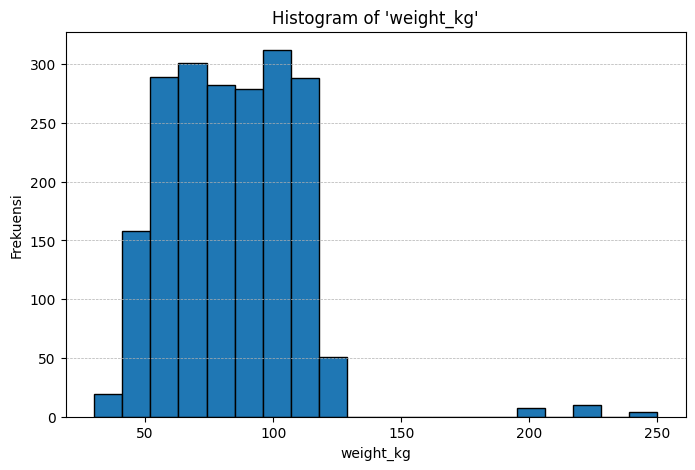

In [71]:
#5. memvisualisasika data menggunakan histogram
if len(numeric_cols) > 0:
    variances = df[numeric_cols].var().sort_values(ascending=False)
    top_col = variances.index[0]
    plt.figure(figsize=(8,5))
    plt.hist(df[top_col].dropna(), bins=20, edgecolor="black")
    plt.title(f"Histogram of '{top_col}'")
    plt.xlabel(top_col)
    plt.ylabel("Frekuensi")
    plt.grid(axis='y', linestyle='--', linewidth=0.5)
    plt.show()

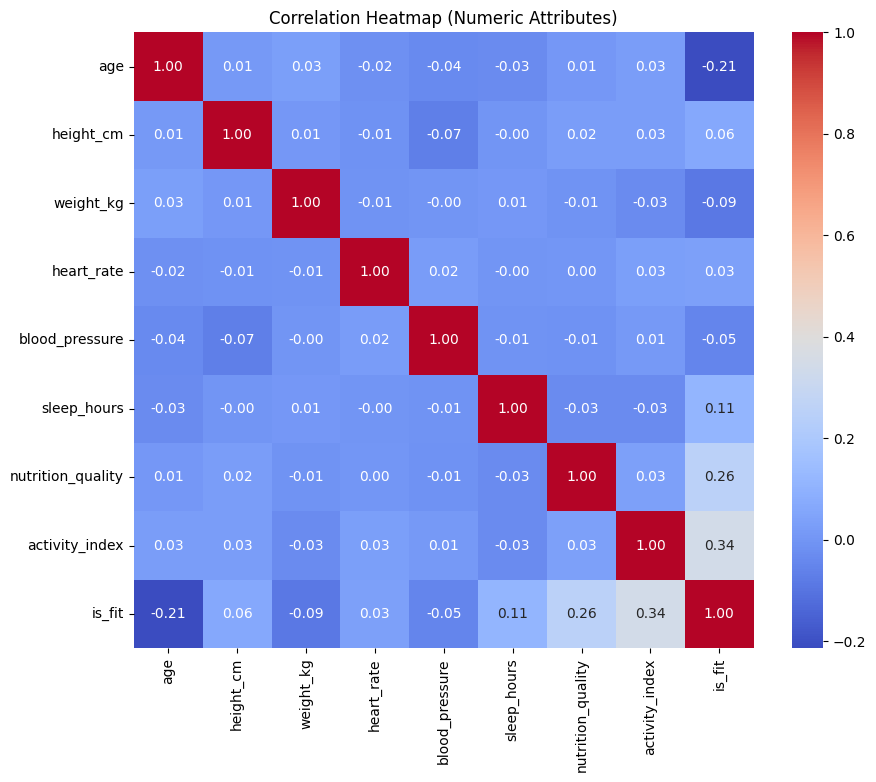

In [72]:
#6. menampilkan korelasi dataset menggunakan heatmap
if len(numeric_cols) > 1:
    plt.figure(figsize=(10,8))
    sns.heatmap(df[numeric_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
    plt.title("Correlation Heatmap (Numeric Attributes)")
    plt.show()

Kesimpulan Analisis dan Visualisasi Dataset fitness
1. Menunjukkan rata-rata, standar deviasi, nilai minimum, nilai maksimum, Q1, Q2, Q3 data yang bernilai numerik sehingga kita bisa dengan mudah melihat distribusi datanya
2. Dari 10 record pertama atribut numerik dapat di lihat data tersusun dengan rapi dan tidak ada nilai yang terlalu ekstrem
3. Dataset terdiri dari 9 atribut numerik dan 2 atribut objek(sebenarnya is_fit bisa dijadikan kategorikal namun karena memakai (0,1) jadi saya masukkan juga di numerik, untuk kedepannya akan saya sesuaikan lagi apakah baiknya di jadikan numerik atau kategorikal)
4. Menampilkan jumlah label dari atribut yang bernilai objek, yang perlu di perhatikan adalah atribut smokes perlu di bersihkan karena labelnya tidak konsisten karena ada gabungan yes/no dan 0/1. Sisanya sudah baik.
5. Dari histogram bisa dilihat apakah distribusinya normal, miring ke kiri, atau miring ke kanan.
6. Memperlihatkan hubungan antar atribut numerik.
7. Secara umum dataset fitness ini sudah cukup bersih dan bisa di olah untuk posttest kedepannya

POSTTEST3

1.membersihkan data
Nilai kosong pada kolom sleep_hours diisi dengan rata-rata agar tidak menghilangkan data penting, kemudian data duplikat dihapus agar model tidak belajar pola yang sama berulang kali.

In [73]:
print("Missing values sebelum cleaning:\n", 
df.isnull().sum())
df = df.dropna()
df = df.drop_duplicates()
print("\nData setelah cleaning:", df.shape)

Missing values sebelum cleaning:
 age                    0
height_cm              0
weight_kg              0
heart_rate             0
blood_pressure         0
sleep_hours          160
nutrition_quality      0
activity_index         0
smokes                 0
gender                 0
is_fit                 0
dtype: int64

Data setelah cleaning: (1840, 11)


Handling outlier (Data ekstrem dideteksi menggunakan metode IQR (Interquartile Range) untuk menjaga kualitas data numerik). Handling yang pertama adalah umur

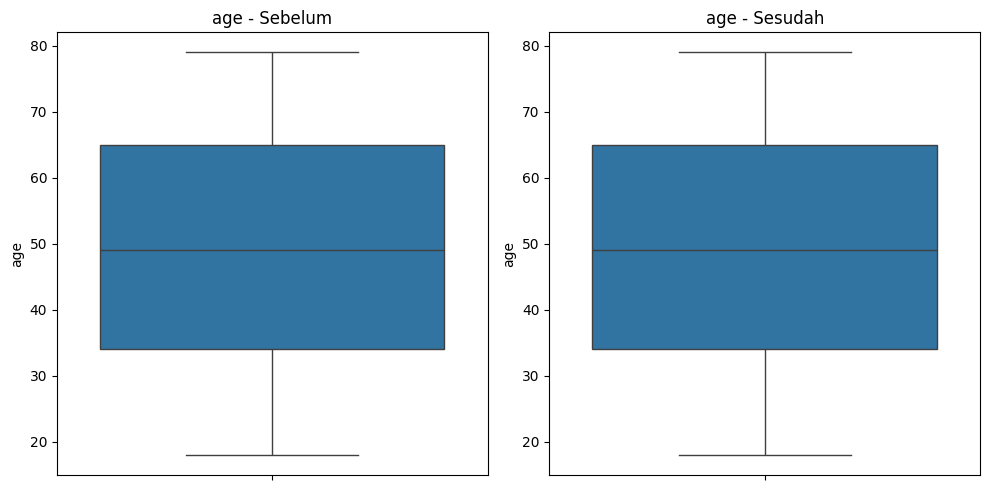

Jumlah data awal: 1840
Jumlah data sesudah handling outlier di age: 1840
Data yang dihapus: 0


In [74]:
col = "age"

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.boxplot(y=df[col], ax=axes[0])
axes[0].set_title(f"{col} - Sebelum")

Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1

df_filtered = df[(df[col] >= (Q1 - 1.5 * IQR)) & (df[col] <= (Q3 + 1.5 * IQR))]

sns.boxplot(y=df_filtered[col], ax=axes[1])
axes[1].set_title(f"{col} - Sesudah")

plt.tight_layout()
plt.show()

print(f"Jumlah data awal: {len(df)}")
print(f"Jumlah data sesudah handling outlier di {col}: {len(df_filtered)}")
print(f"Data yang dihapus: {len(df) - len(df_filtered)}")

handling outlier tinggi badan

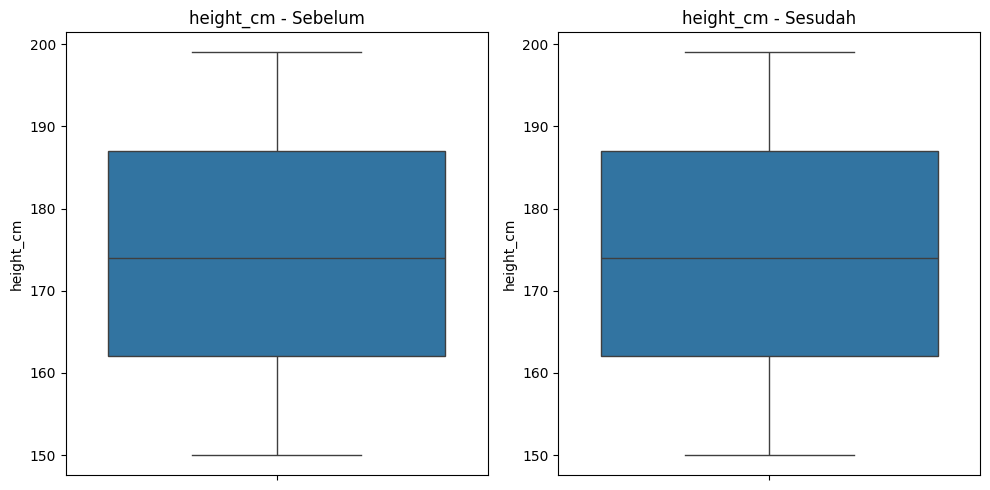

Jumlah data awal: 1840
Jumlah data sesudah handling outlier di height_cm: 1840
Data yang dihapus: 0


In [75]:
col = "height_cm"

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.boxplot(y=df[col], ax=axes[0])
axes[0].set_title(f"{col} - Sebelum")

Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1

df_filtered = df[(df[col] >= (Q1 - 1.5 * IQR)) & (df[col] <= (Q3 + 1.5 * IQR))]

sns.boxplot(y=df_filtered[col], ax=axes[1])
axes[1].set_title(f"{col} - Sesudah")

plt.tight_layout()
plt.show()

print(f"Jumlah data awal: {len(df)}")
print(f"Jumlah data sesudah handling outlier di {col}: {len(df_filtered)}")
print(f"Data yang dihapus: {len(df) - len(df_filtered)}")

handling outlier berat badan

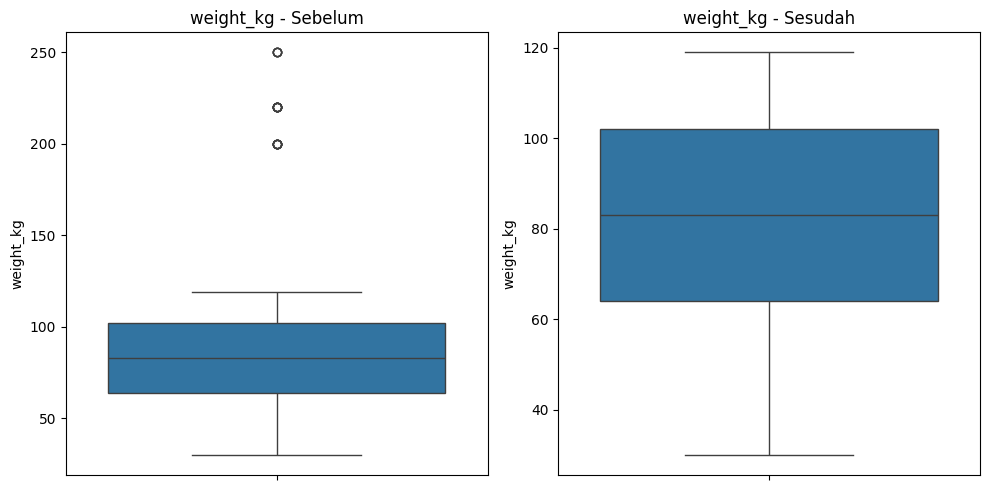

Jumlah data awal: 1840
Jumlah data sesudah handling outlier di weight_kg: 1821
Data yang dihapus: 19


In [76]:
col = "weight_kg"

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.boxplot(y=df[col], ax=axes[0])
axes[0].set_title(f"{col} - Sebelum")

Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1

df_filtered = df[(df[col] >= (Q1 - 1.5 * IQR)) & (df[col] <= (Q3 + 1.5 * IQR))]

sns.boxplot(y=df_filtered[col], ax=axes[1])
axes[1].set_title(f"{col} - Sesudah")

plt.tight_layout()
plt.show()

print(f"Jumlah data awal: {len(df)}")
print(f"Jumlah data sesudah handling outlier di {col}: {len(df_filtered)}")
print(f"Data yang dihapus: {len(df) - len(df_filtered)}")

handling outlier denyut jantung

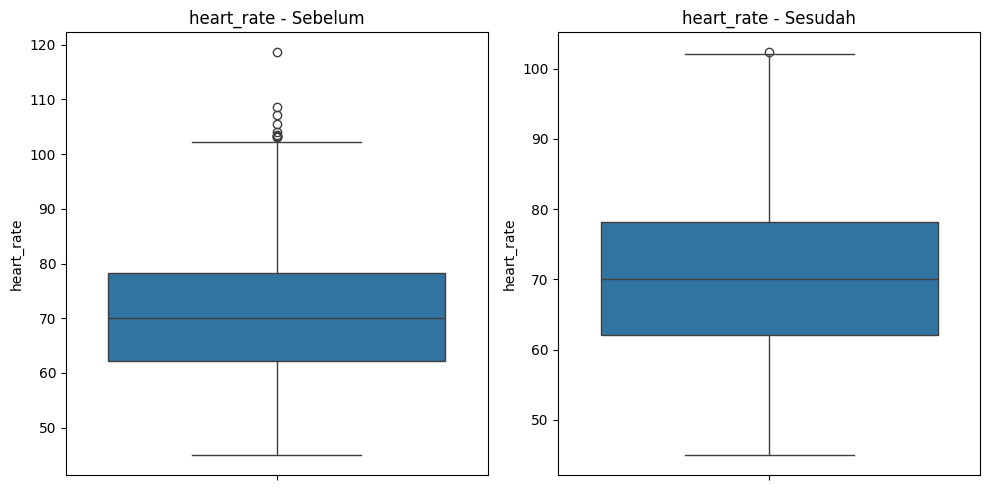

Jumlah data awal: 1840
Jumlah data sesudah handling outlier di heart_rate: 1830
Data yang dihapus: 10


In [77]:
col = "heart_rate"

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.boxplot(y=df[col], ax=axes[0])
axes[0].set_title(f"{col} - Sebelum")

Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1

df_filtered = df[(df[col] >= (Q1 - 1.5 * IQR)) & (df[col] <= (Q3 + 1.5 * IQR))]

sns.boxplot(y=df_filtered[col], ax=axes[1])
axes[1].set_title(f"{col} - Sesudah")

plt.tight_layout()
plt.show()

print(f"Jumlah data awal: {len(df)}")
print(f"Jumlah data sesudah handling outlier di {col}: {len(df_filtered)}")
print(f"Data yang dihapus: {len(df) - len(df_filtered)}")

handling outlier tekanan darah

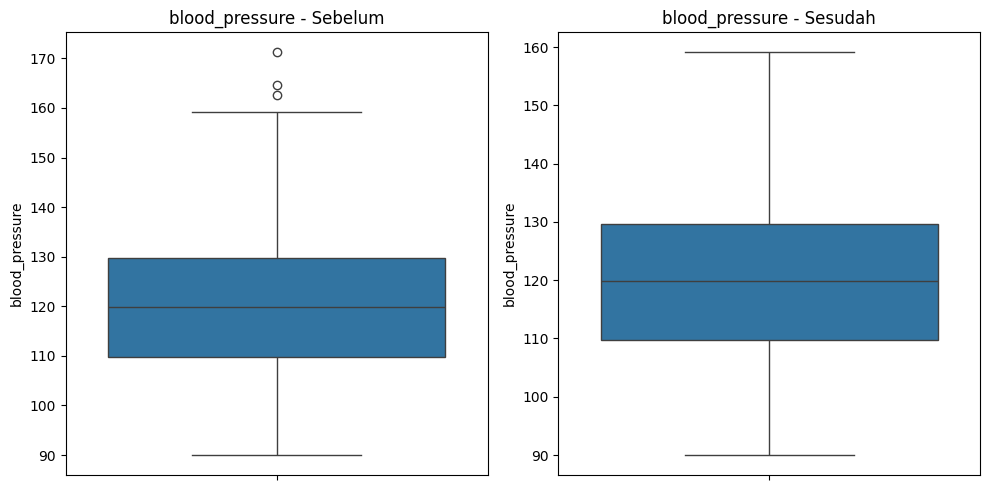

Jumlah data awal: 1840
Jumlah data sesudah handling outlier di blood_pressure: 1837
Data yang dihapus: 3


In [78]:
col = "blood_pressure"

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.boxplot(y=df[col], ax=axes[0])
axes[0].set_title(f"{col} - Sebelum")

Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1

df_filtered = df[(df[col] >= (Q1 - 1.5 * IQR)) & (df[col] <= (Q3 + 1.5 * IQR))]

sns.boxplot(y=df_filtered[col], ax=axes[1])
axes[1].set_title(f"{col} - Sesudah")

plt.tight_layout()
plt.show()

print(f"Jumlah data awal: {len(df)}")
print(f"Jumlah data sesudah handling outlier di {col}: {len(df_filtered)}")
print(f"Data yang dihapus: {len(df) - len(df_filtered)}")

handling outlier jam tidur

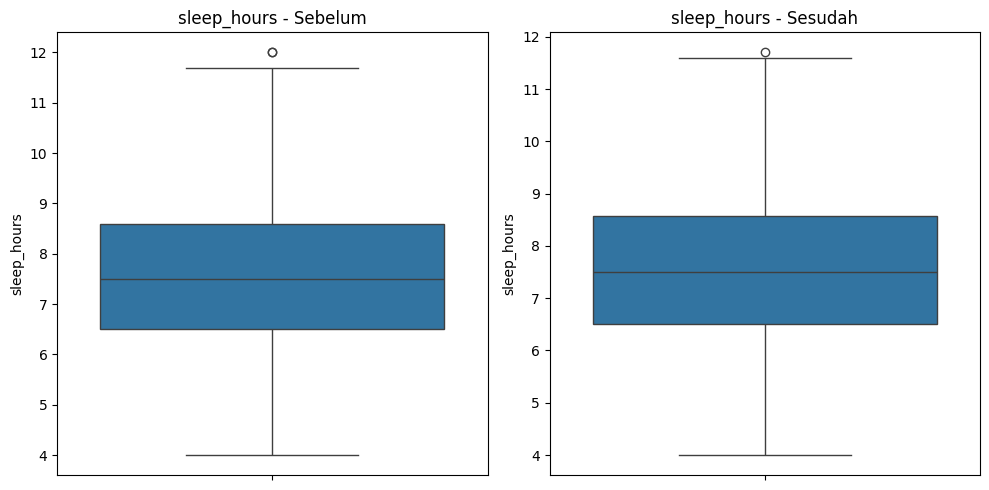

Jumlah data awal: 1840
Jumlah data sesudah handling outlier di sleep_hours: 1838
Data yang dihapus: 2


In [79]:
col = "sleep_hours"

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.boxplot(y=df[col], ax=axes[0])
axes[0].set_title(f"{col} - Sebelum")

Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1

df_filtered = df[(df[col] >= (Q1 - 1.5 * IQR)) & (df[col] <= (Q3 + 1.5 * IQR))]

sns.boxplot(y=df_filtered[col], ax=axes[1])
axes[1].set_title(f"{col} - Sesudah")

plt.tight_layout()
plt.show()

print(f"Jumlah data awal: {len(df)}")
print(f"Jumlah data sesudah handling outlier di {col}: {len(df_filtered)}")
print(f"Data yang dihapus: {len(df) - len(df_filtered)}")

handling outlier kualitas nutrisi

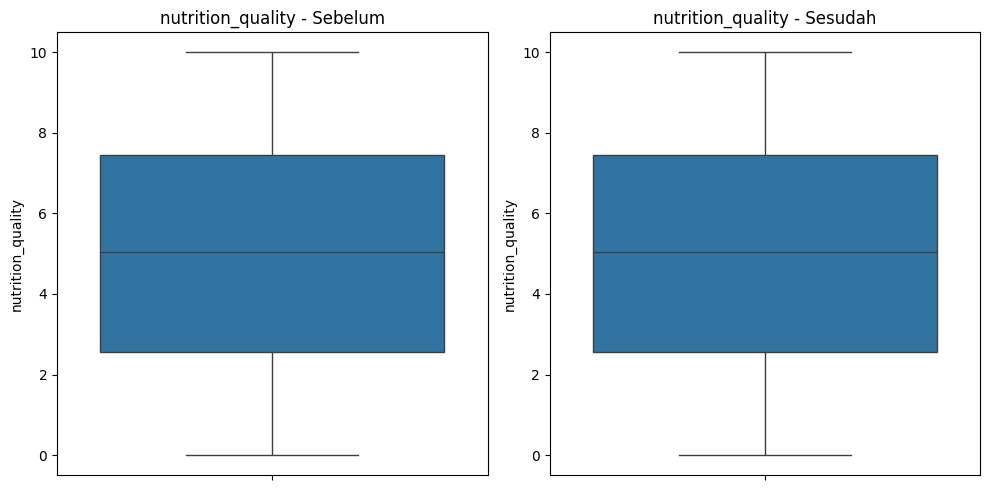

Jumlah data awal: 1840
Jumlah data sesudah handling outlier di nutrition_quality: 1840
Data yang dihapus: 0


In [80]:
col = "nutrition_quality"

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.boxplot(y=df[col], ax=axes[0])
axes[0].set_title(f"{col} - Sebelum")

Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1

df_filtered = df[(df[col] >= (Q1 - 1.5 * IQR)) & (df[col] <= (Q3 + 1.5 * IQR))]

sns.boxplot(y=df_filtered[col], ax=axes[1])
axes[1].set_title(f"{col} - Sesudah")

plt.tight_layout()
plt.show()

print(f"Jumlah data awal: {len(df)}")
print(f"Jumlah data sesudah handling outlier di {col}: {len(df_filtered)}")
print(f"Data yang dihapus: {len(df) - len(df_filtered)}")

handling outlier indeks aktivitas

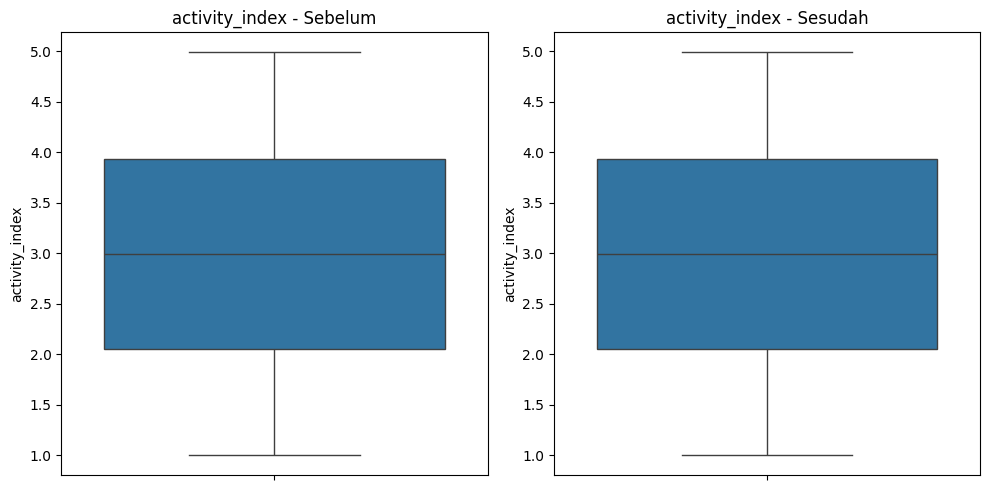

Jumlah data awal: 1840
Jumlah data sesudah handling outlier di activity_index: 1840
Data yang dihapus: 0


In [81]:
col = "activity_index"

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.boxplot(y=df[col], ax=axes[0])
axes[0].set_title(f"{col} - Sebelum")

Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1

df_filtered = df[(df[col] >= (Q1 - 1.5 * IQR)) & (df[col] <= (Q3 + 1.5 * IQR))]

sns.boxplot(y=df_filtered[col], ax=axes[1])
axes[1].set_title(f"{col} - Sesudah")

plt.tight_layout()
plt.show()

print(f"Jumlah data awal: {len(df)}")
print(f"Jumlah data sesudah handling outlier di {col}: {len(df_filtered)}")
print(f"Data yang dihapus: {len(df) - len(df_filtered)}")

2.Normalisasi kolom numerik
Normalisasi mengubah skala data agar memiliki rata-rata= 0 dan standar deviasi 1.

In [82]:
numeric_cols = ['age', 'height_cm', 'weight_kg', 'heart_rate',
                'blood_pressure', 'sleep_hours', 'nutrition_quality', 'activity_index']
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
print("Data setelah normalisasi (5 baris pertama):")
df.head()

Data setelah normalisasi (5 baris pertama):


,age,height_cm,weight_kg,heart_rate,blood_pressure,sleep_hours,nutrition_quality,activity_index,smokes,gender,is_fit
1,1.106931,0.798660,0.435046,-0.797635,-0.350896,-0.008867,1.307542,0.169538,0,F,1
3,-0.954898,1.007035,-0.030623,-0.848567,0.704627,-0.341840,0.403520,0.602469,0,M,1
4,0.605405,0.034616,0.590269,-1.026827,-0.281908,0.324106,1.719412,1.618533,yes,F,1
5,-1.344974,-0.173759,0.046989,0.934034,-0.047347,0.124322,0.811900,0.955883,yes,M,0
6,1.608456,1.284869,-0.030623,0.798217,0.870199,-0.075462,-0.999632,0.372750,yes,F,0


3.Encoding kolom kategorikal
karena model machine learning hanya bisa memproses angka bukan teks, maka kolom kategorikal seperti gender dan smokes diubah menjadi nilai numerik menggunakan label encoding.

In [83]:
categorical_cols = ['gender', 'smokes']
label_enc = LabelEncoder()
for col in categorical_cols:
    df[col] = label_enc.fit_transform(df[col])
print("Data setelah encoding kategorikal (5 baris pertama):")
df.head()

Data setelah encoding kategorikal (5 baris pertama):


,age,height_cm,weight_kg,heart_rate,blood_pressure,sleep_hours,nutrition_quality,activity_index,smokes,gender,is_fit
1,1.106931,0.798660,0.435046,-0.797635,-0.350896,-0.008867,1.307542,0.169538,0,0,1
3,-0.954898,1.007035,-0.030623,-0.848567,0.704627,-0.341840,0.403520,0.602469,0,1,1
4,0.605405,0.034616,0.590269,-1.026827,-0.281908,0.324106,1.719412,1.618533,3,0,1
5,-1.344974,-0.173759,0.046989,0.934034,-0.047347,0.124322,0.811900,0.955883,3,1,0
6,1.608456,1.284869,-0.030623,0.798217,0.870199,-0.075462,-0.999632,0.372750,3,0,0


4.Feature engineering(membuat BMI)
Fitur BMI (Body Mass Index) menggambarkan rasio berat terhadap tinggi badan seseorang. BMI berkaitan langsung dengan kebugaran, sehingga sangat berhubungan terhadap target is_fit.

In [84]:
df["height_m"] = df["height_cm"] / 100
df["BMI"] = df["weight_kg"] / (df["height_m"] ** 2)
def bmi_category(bmi):
    if bmi < 18.5:
        return "Kurus"
    elif bmi < 25:
        return "Normal"
    elif bmi < 30:
        return "Kelebihan Berat Badan"
    else:
        return "Obesitas"
df["bmi_category"] = df["BMI"].apply(bmi_category)
print(df[["weight_kg", "height_cm", "BMI", "bmi_category"]].head())

   weight_kg  height_cm           BMI bmi_category
1   0.435046   0.798660  6.820428e+03     Obesitas
3  -0.030623   1.007035 -3.019641e+02        Kurus
4   0.590269   0.034616  4.926017e+06     Obesitas
5   0.046989  -0.173759  1.556309e+04     Obesitas
6  -0.030623   1.284869 -1.854927e+02        Kurus


5.Data training & data testing
Pada kasus ini data di bagi menjadi 2 bagian yaitu training sebesar 80% dan testing 20%, proses ini wajib dilakukan agar model tidak mengalami overfitting.

In [85]:
le = LabelEncoder()
df["gender"] = le.fit_transform(df["gender"])
df["smokes"] = le.fit_transform(df["smokes"].astype(str))
df["bmi_category"] = le.fit_transform(df["bmi_category"])

X = df.drop(columns=["is_fit"])
y = df["is_fit"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Ukuran data training :", X_train.shape)
print("Ukuran data testing  :", X_test.shape)

Ukuran data training : (1472, 13)
Ukuran data testing  : (368, 13)
